In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_text

In [6]:
file_path = '/content/Telco-Customer-Churn.xlsx'#define excel path
data  = pd.read_excel(file_path)#read as assign excel to dataframe df
df=data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# There is no nulls but variation in categorical entries of the same variable can be a issue

In [7]:
#CustomerID is a unique identifer it wont effect churning
df_1=df
df_1.drop("customerID", axis=1, inplace=True)  # Drop the column in-place
df_1.info()  # Display information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df_1['TotalCharges'] = pd.to_numeric(df_1['TotalCharges'], errors='coerce')


In [ ]:
# Preprocessing: Convert categorical variables into numerical using Label Encoding
le = preprocessing.LabelEncoder()
for col in df_1.select_dtypes(include=['object']).columns:
    df_1[col] = le.fit_transform(df_1[col])

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df_1.drop('Churn', axis=1)
y = df_1['Churn']

In [ ]:
# Initialize SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values in X_train
X = imputer.fit_transform(X)

The number 42 in the code random_state=42 is used as the value for the random seed. The choice of the value 42 is arbitrary and has no special significance in this context. It's a convention often used in programming and computer science to represent a "magic number" or placeholder value.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict churn on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7253371185237757
Confusion Matrix:
 [[833 203]
 [184 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



#Accuracy:0.73

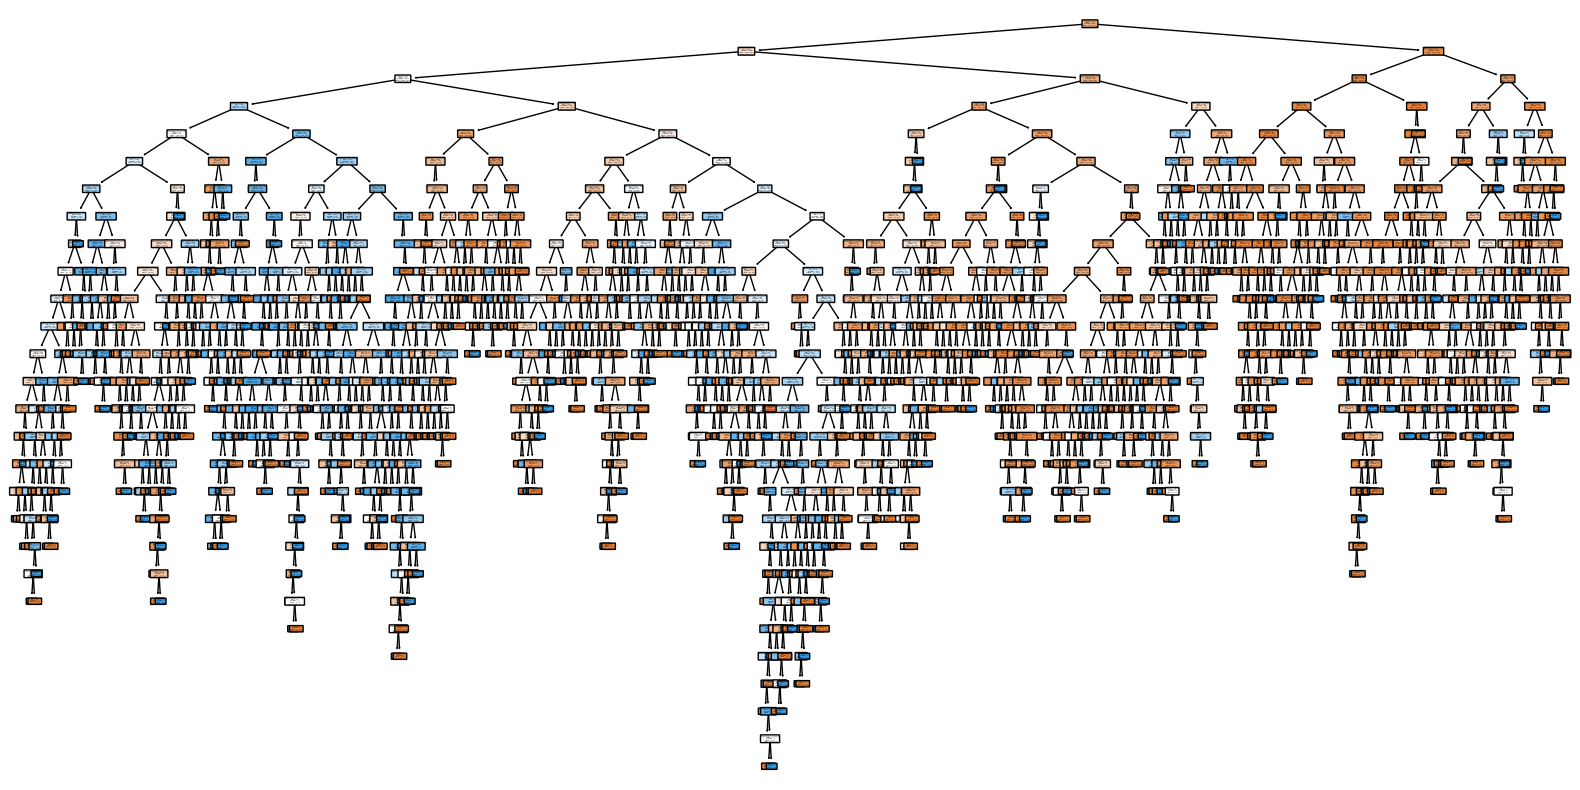

In [ ]:
# List of feature names in the same order as they appear in X
feature_names = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "tenure",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "MonthlyCharges",
    "TotalCharges"
]


# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=["Not Churn", "Churn"], filled=True, rounded=True)
plt.show()

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:


def visualize_decision_tree(model, feature_names, class_names=["Not Churn", "Churn"], max_depth=None):
    """
    Visualizes a decision tree model using the plot_tree function.

    Parameters:
        model (DecisionTreeClassifier): The trained decision tree model.
        feature_names (list): List of feature names in the same order as they appear in the model.
        class_names (list): List of class names for visualization.
        max_depth (int or None): Maximum depth of the tree to visualize. If None, the entire tree is visualized.
    """
    plt.figure(figsize=(40, 30))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        max_depth=max_depth
    )
    plt.show()

# List of feature names in the same order as they appear in X
feature_names = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "tenure",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "MonthlyCharges",
    "TotalCharges"
]




This Tree is too big lets prune it by reducing its depth

In [ ]:
# Initialize and train the Decision Tree model with max_depth parameter
max_depth =5
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7253371185237757
Confusion Matrix:
 [[833 203]
 [184 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



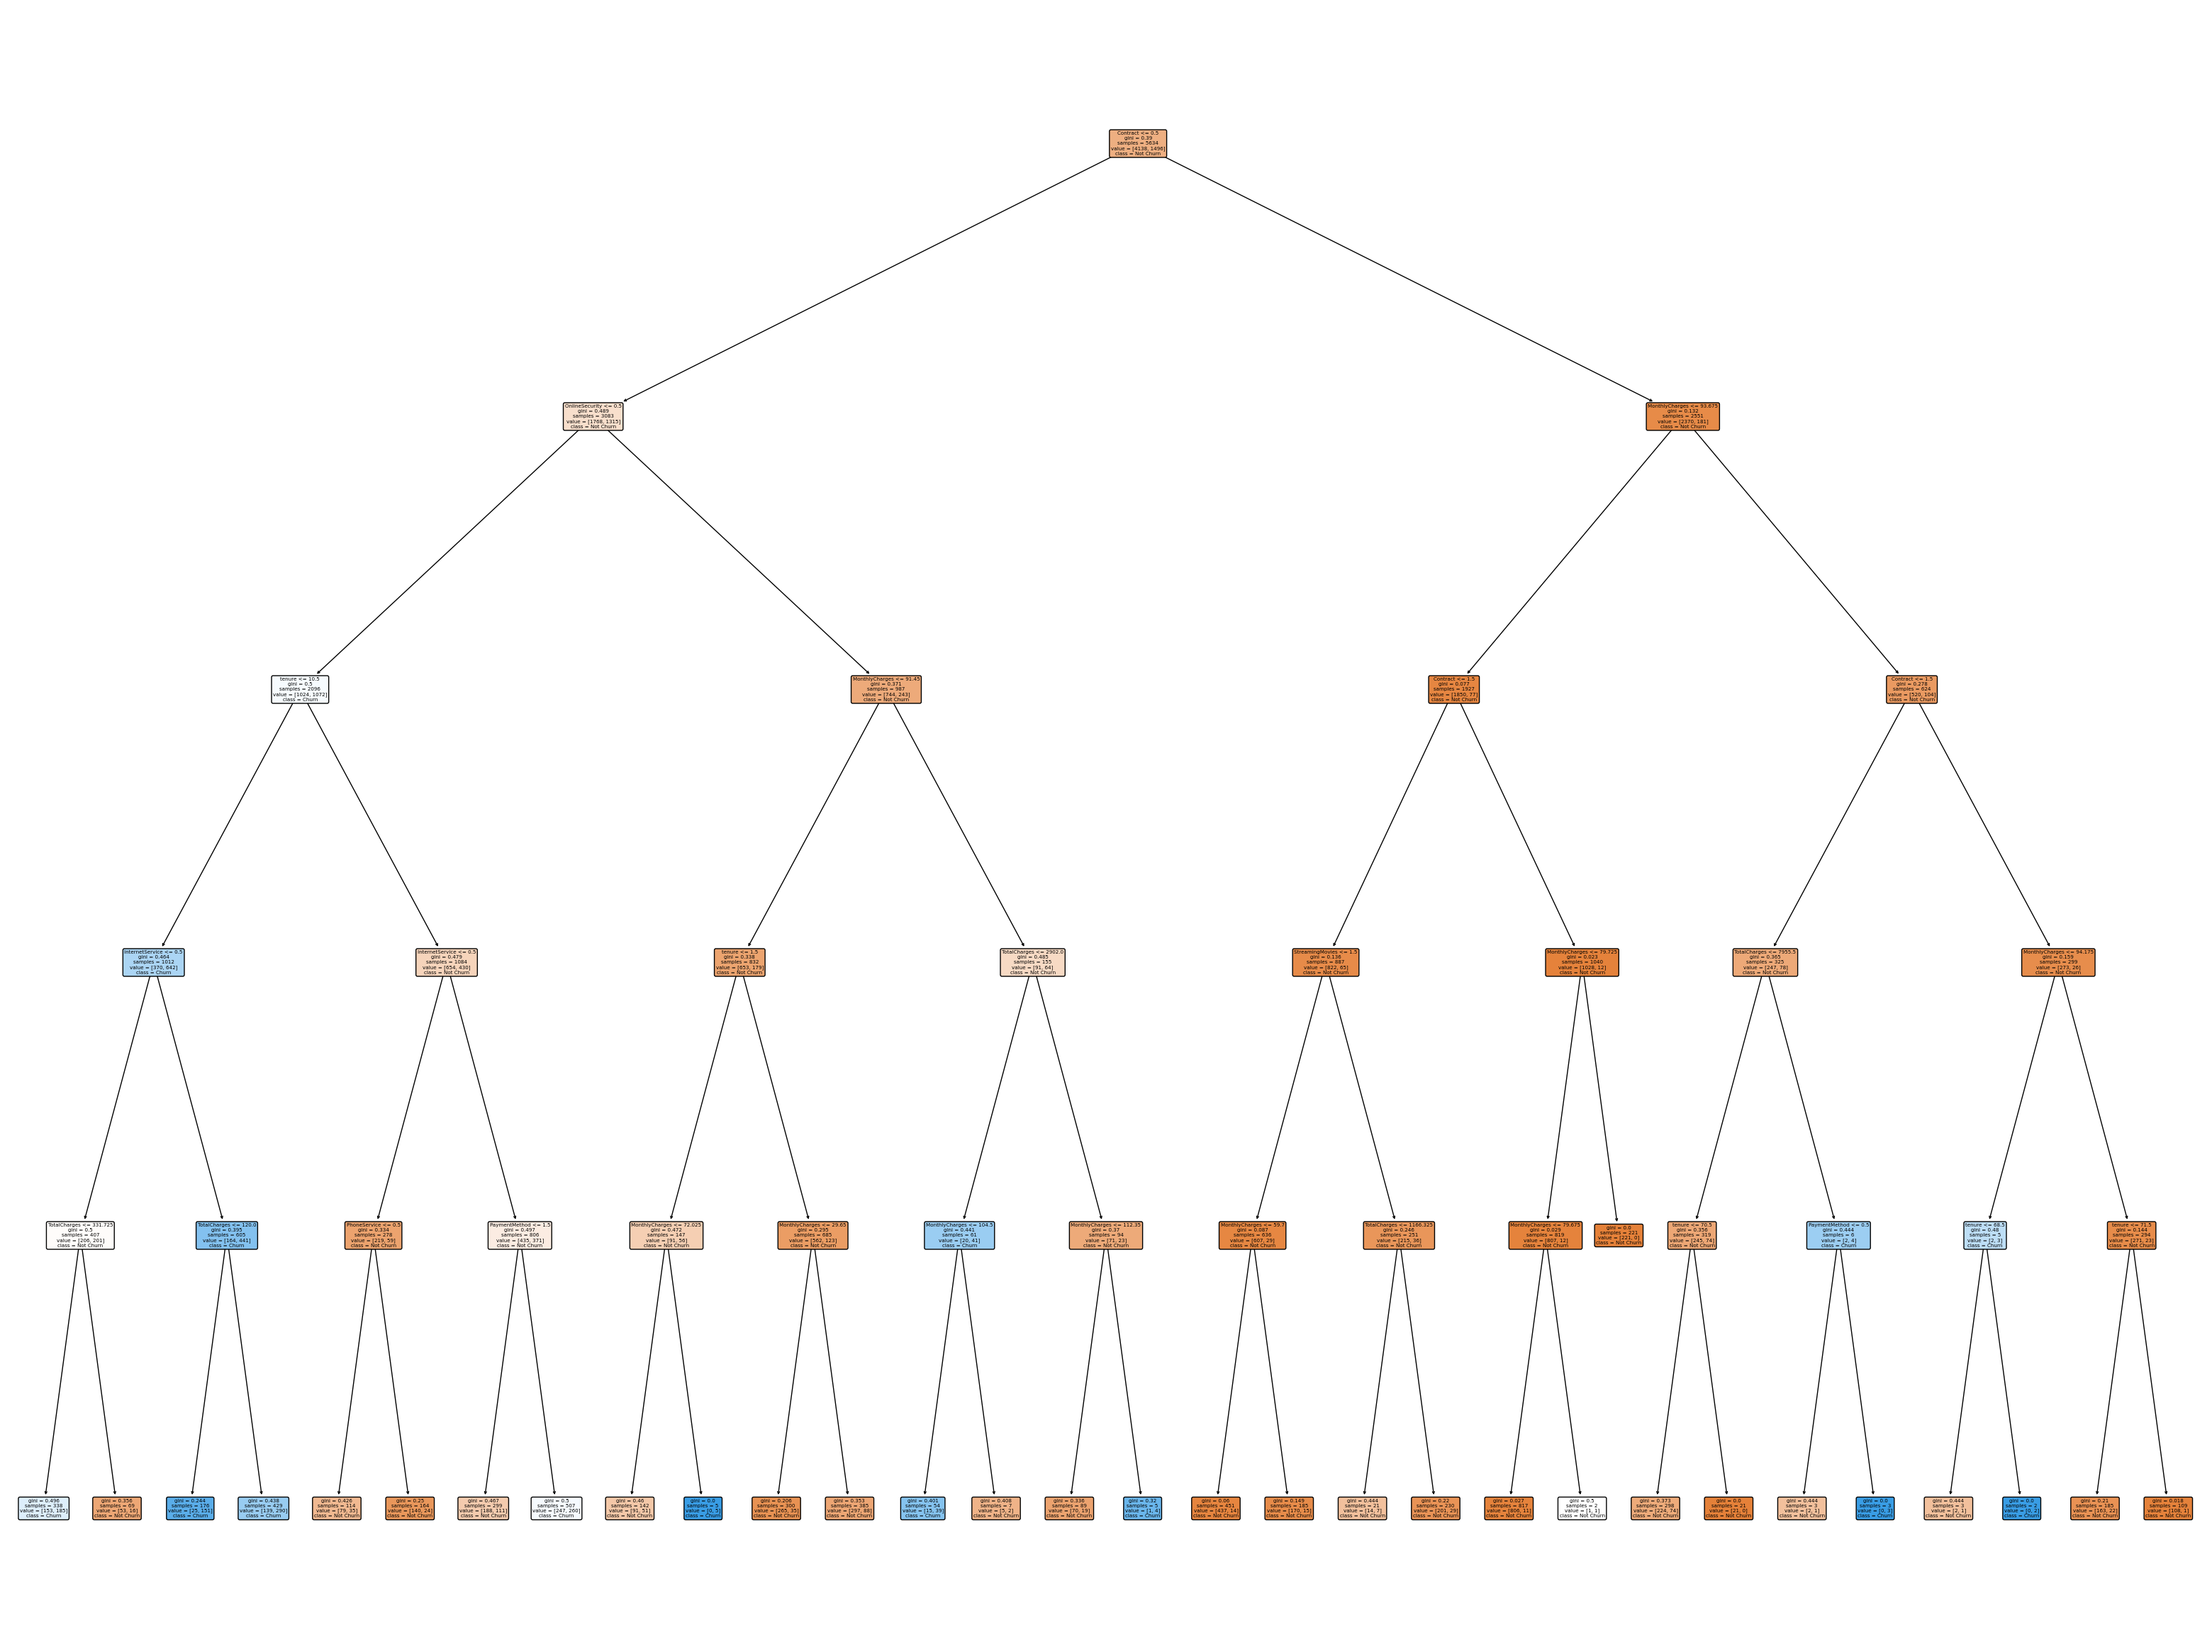

In [ ]:
#Changing depth has not affected the accuracy of the Model
#ploting the tree
# Visualize the pruned decision tree
visualize_decision_tree(model, feature_names, class_names=["Not Churn", "Churn"], max_depth=5)

Accuracy: 0.7253371185237757
Confusion Matrix:
 [[833 203]
 [184 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



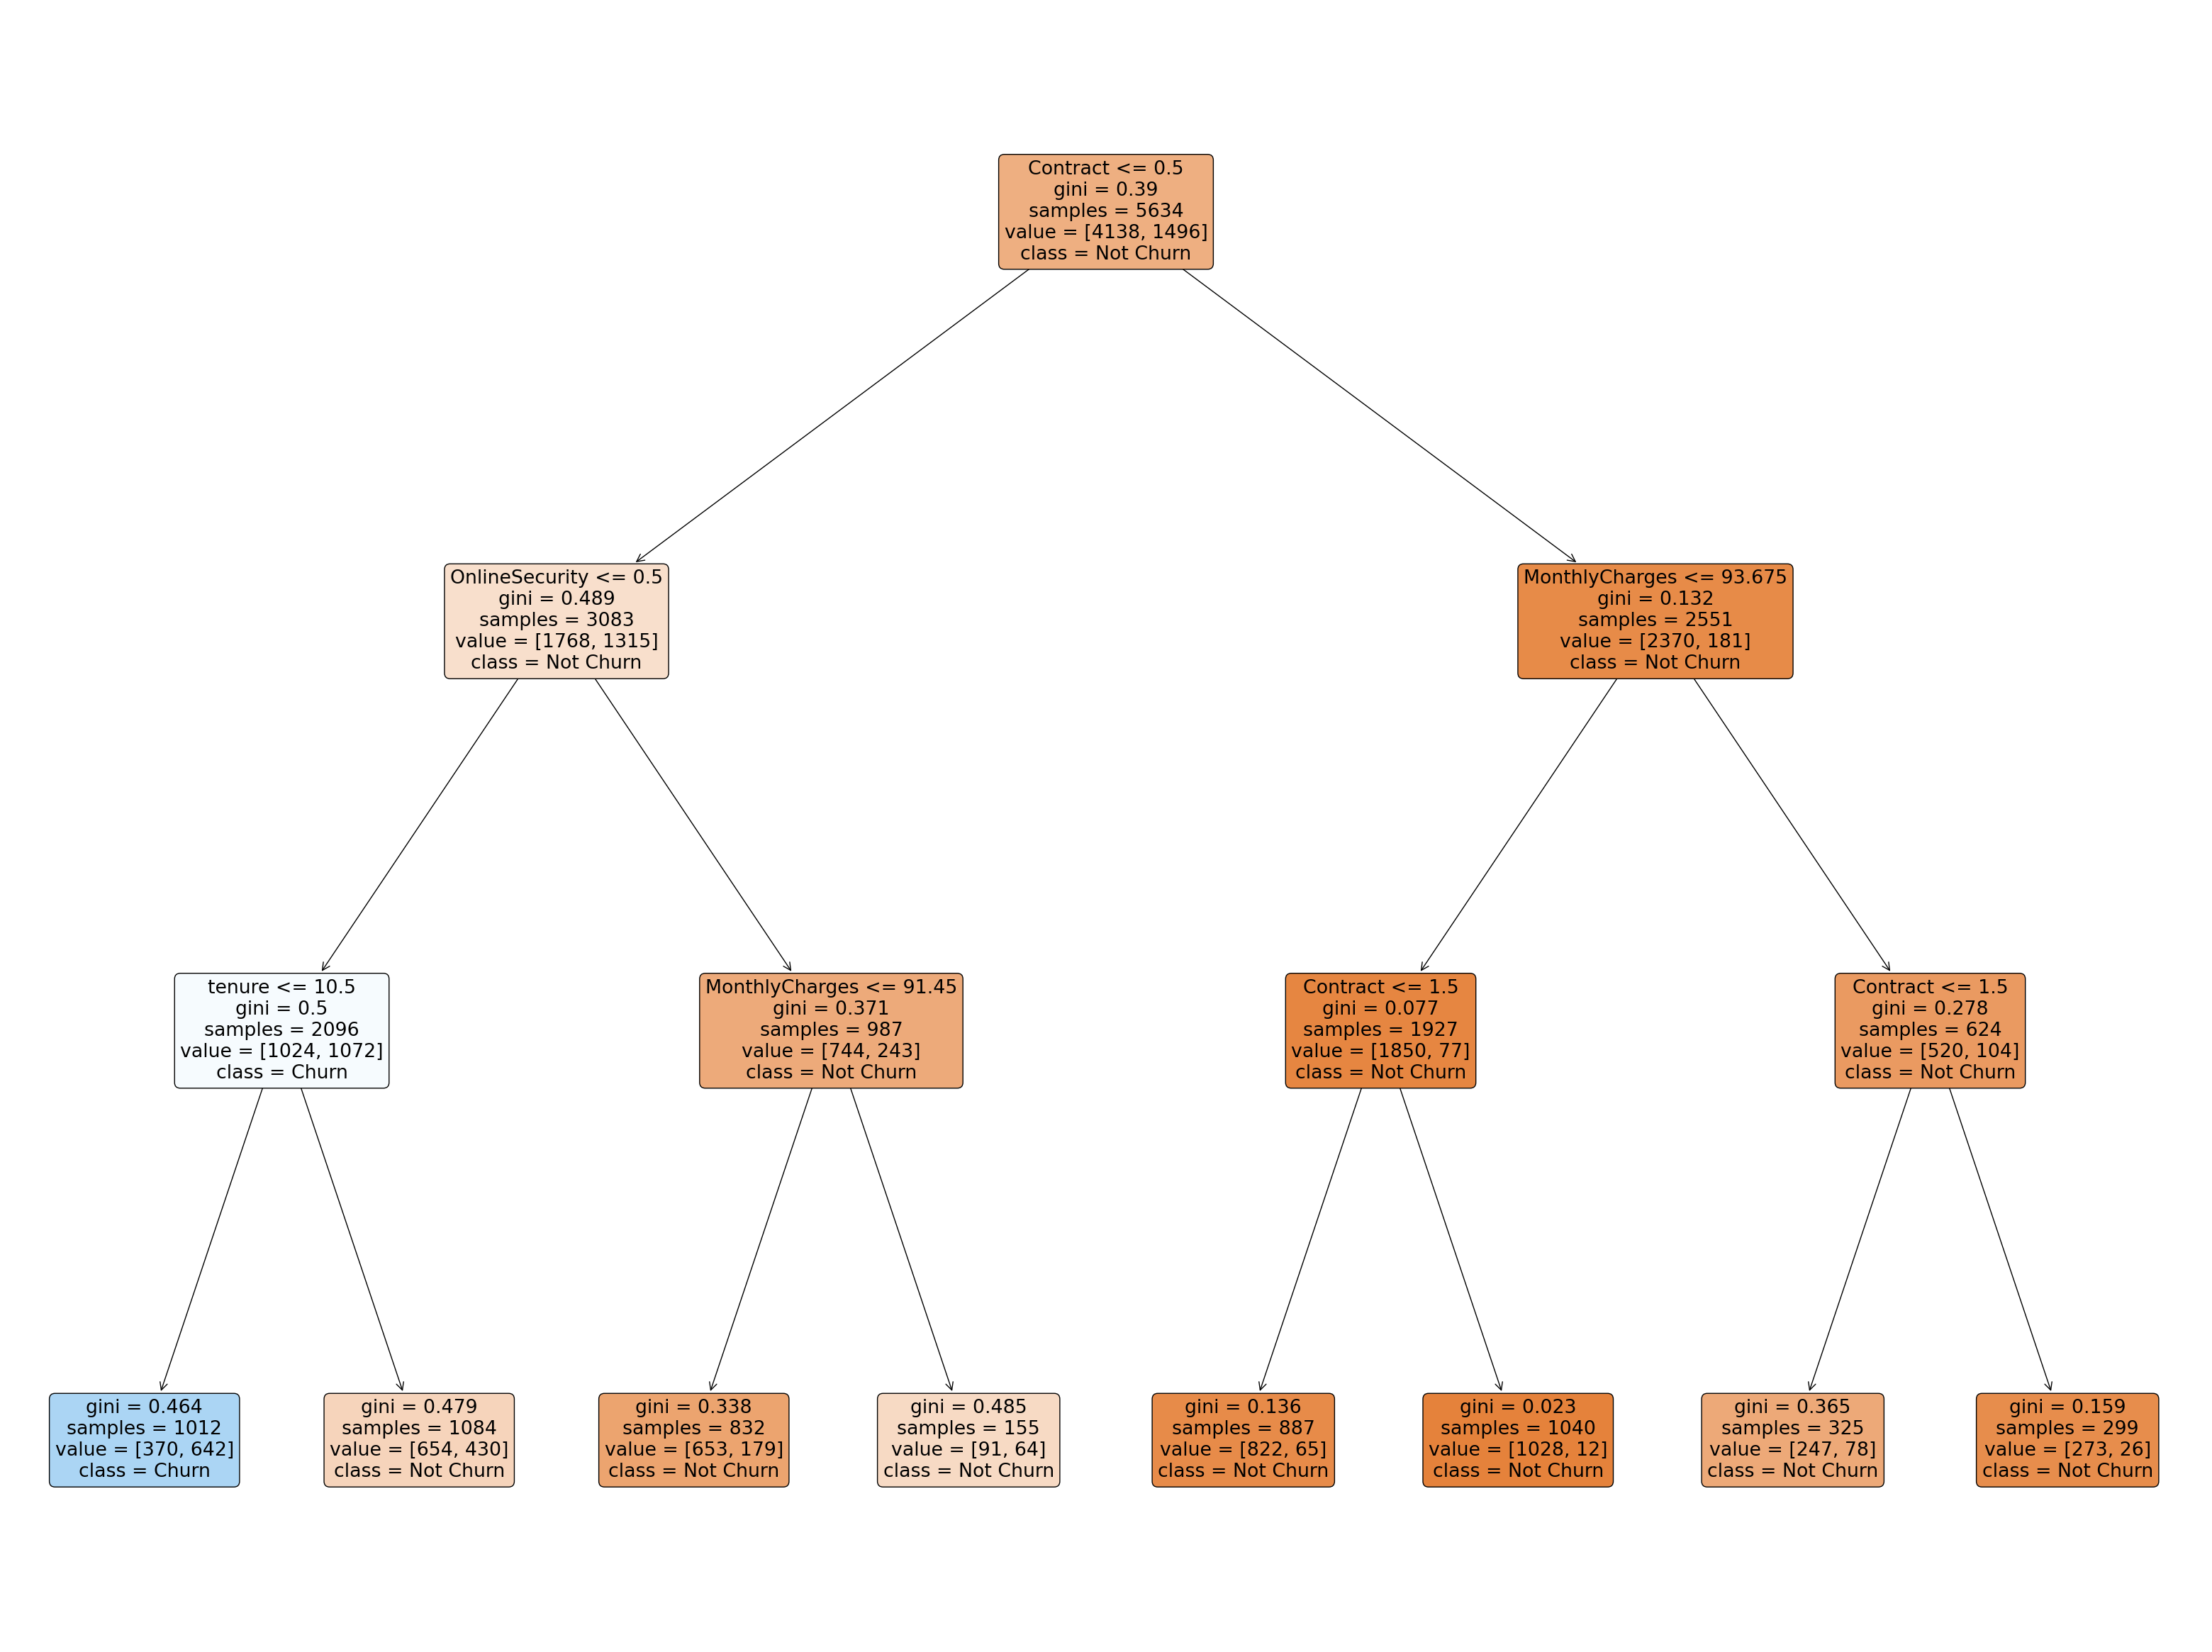

In [ ]:
# Initialize and train the Decision Tree model with max_depth parameter
max_depth =3
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
visualize_decision_tree(model, feature_names, class_names=["Not Churn", "Churn"], max_depth=3)

Accuracy: 0.7253371185237757
Confusion Matrix:
 [[833 203]
 [184 189]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



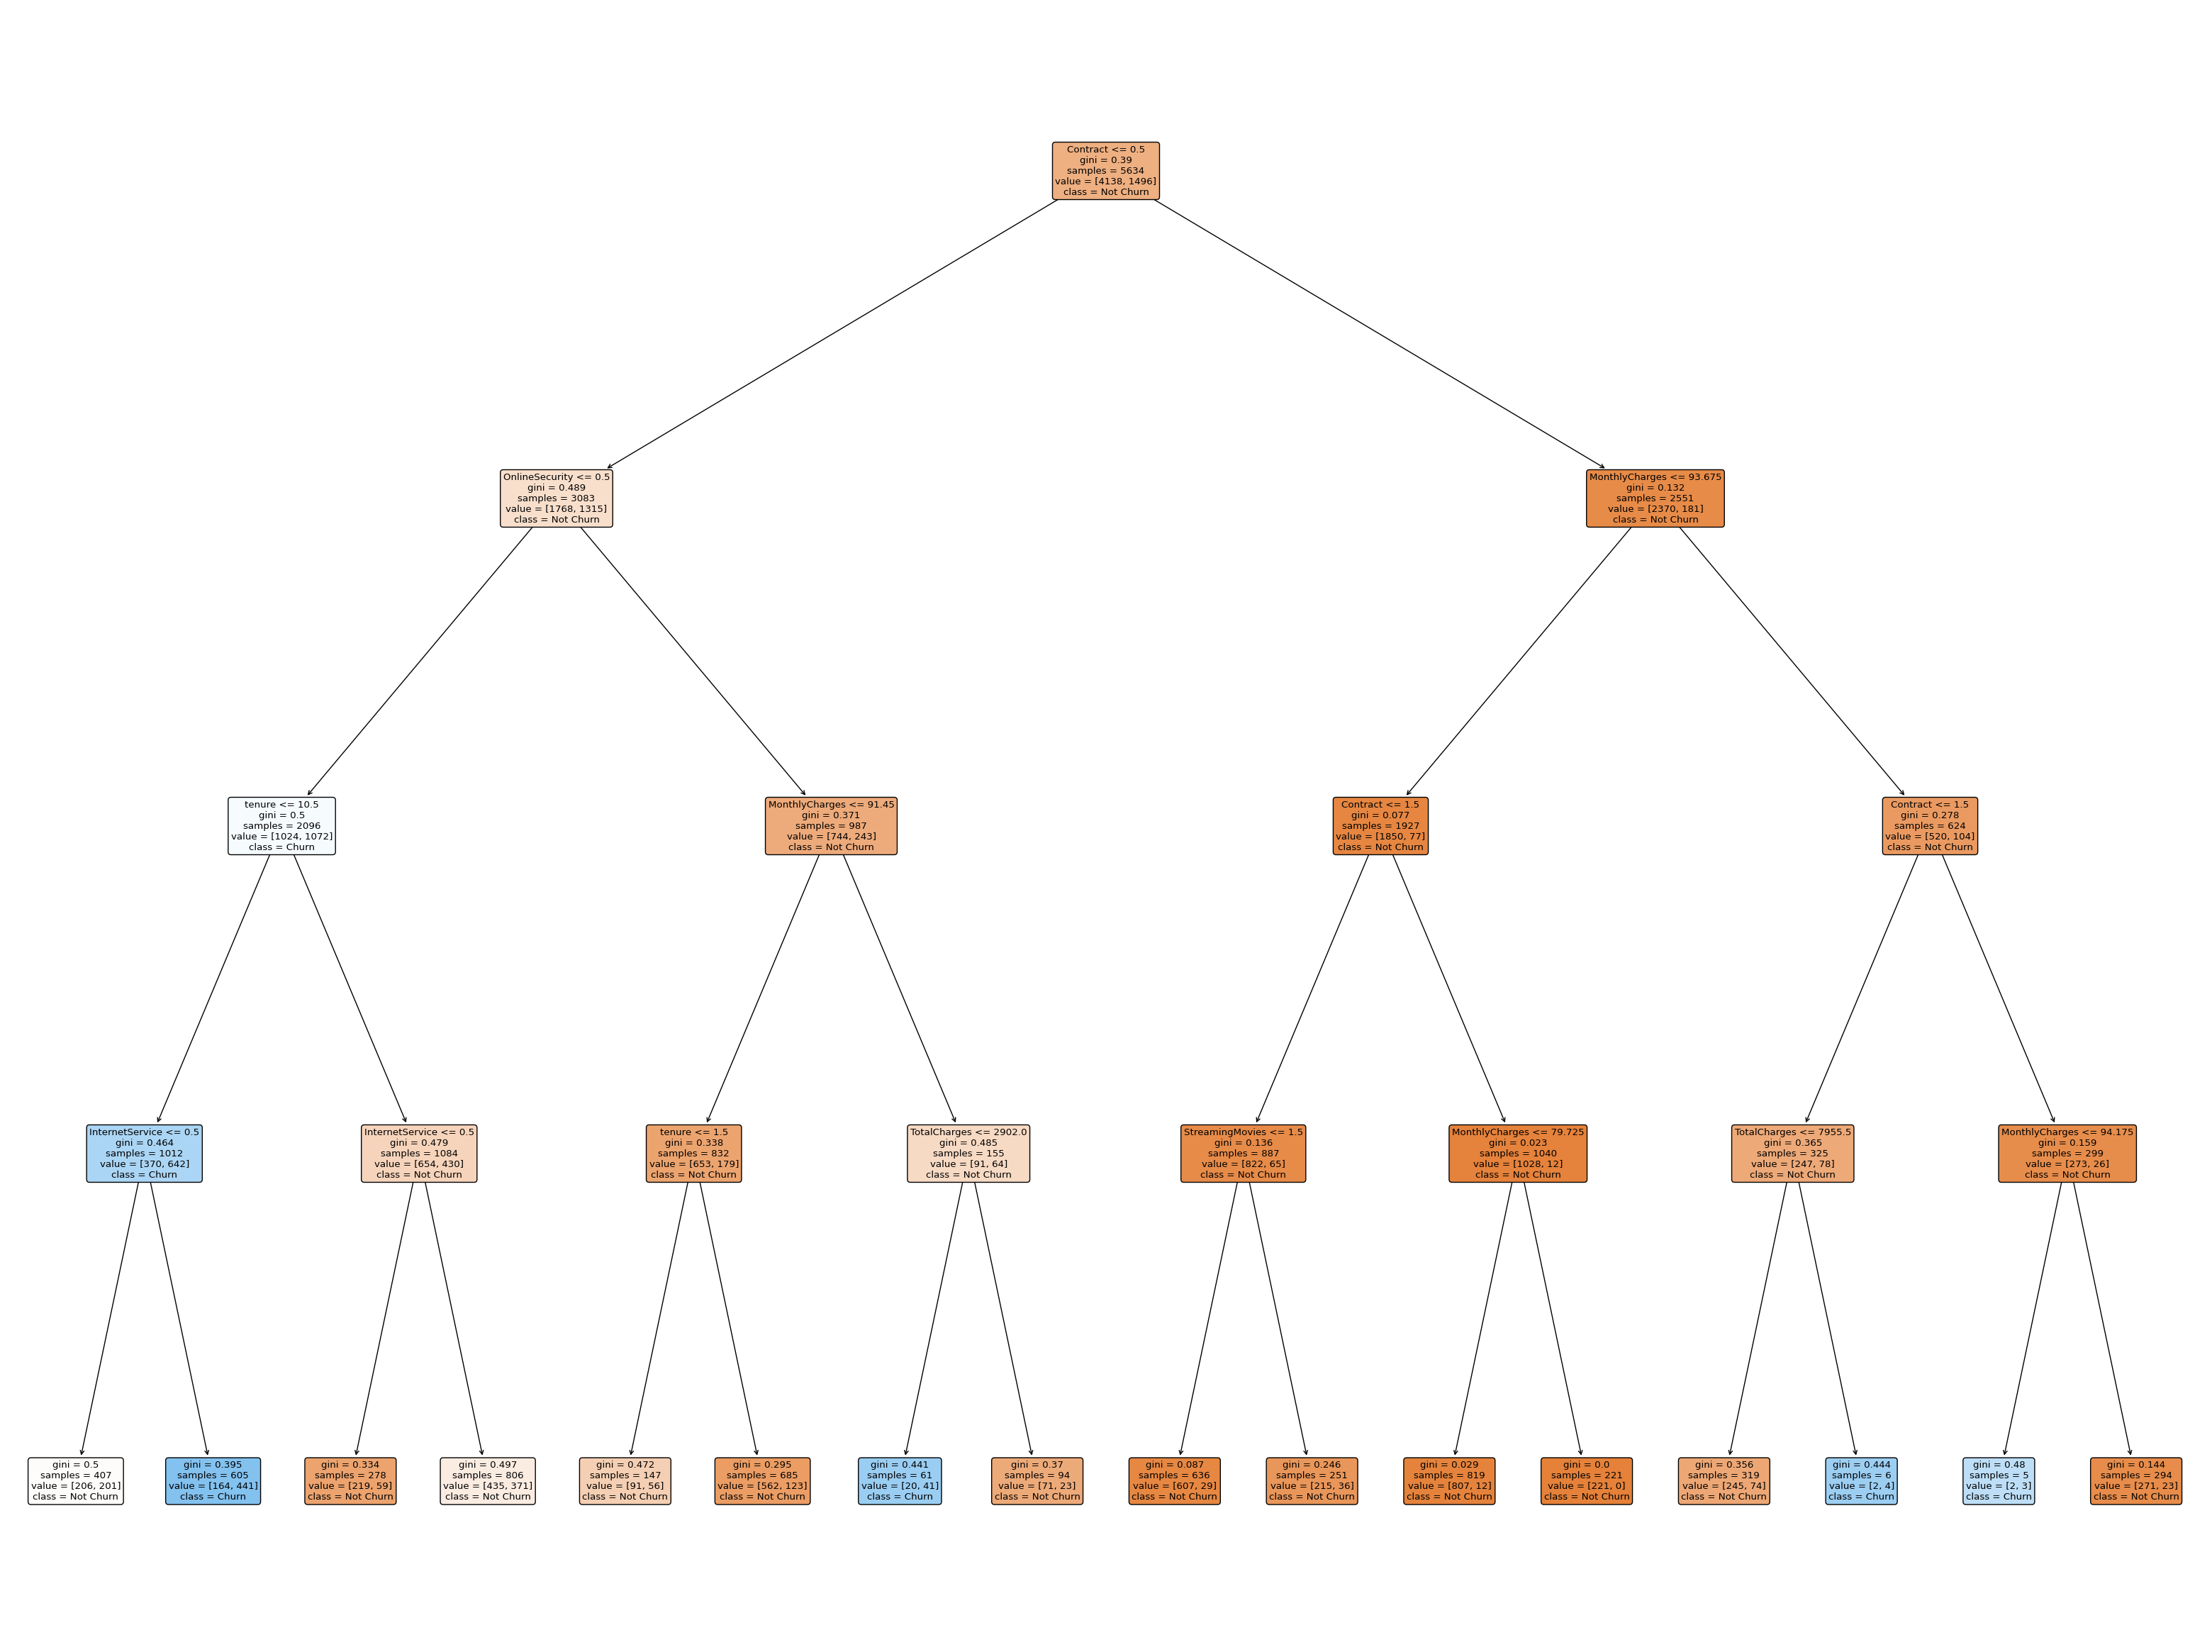

In [ ]:
# Initialize and train the Decision Tree model with max_depth parameter
max_depth =4
model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
visualize_decision_tree(model, feature_names, class_names=["Not Churn", "Churn"], max_depth=4)

Depth 3 has only one leaf node with churn , depth 4 seems more optimal

# Generate the textual representation of the rules


In [ ]:
tree_rules = export_text(model, feature_names=feature_names)

# Specify the file path where you want to save the rules
output_file_path = "/content/decision_tree_rules.txt"

# Write the tree rules to the text file
with open(output_file_path, "w") as f:
    f.write("Decision Tree Rules:\n")
    f.write(tree_rules)

print("Decision tree rules saved to:", output_file_path)

Decision tree rules saved to: /content/decision_tree_rules.txt
